In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)

In [5]:
f = [0.4905, 0.981, 1.4715, 1.962, 2.4525]

x1 = [0.035, 0.071, 0.117, 0.143, 0.179]

x2 = [0.055, 0.107, 0.161, 0.215, 0.267]

k1_raw = list(zip(f, x1))
k2_raw = list(zip(f, x2))

k_s_raw = [(0.4905, 0.087),
(0.981,  0.177),
(1.4715, 0.266)]

k_p_raw = [(0.2943, 0.015),
(0.7848, 0.035),
(1.2753, 0.056),
(1.7658, 0.076)]

In [6]:
def flat(pairs):
    X, Y = [], []
    for x, y in pairs:
        X.append(x)
        Y.append(y)
    return (X, Y)

def reg(x, y):
    m, b, r_value, p_value, std_err = stats.linregress(x, y)
    return {'m':m, 'b':b, 'err':std_err}

def plot_with_reg(x, y, yerr, clr, legend):
    plt.errorbar(x=x, y=y, yerr=yerr, xerr=0, fmt=clr+'o')

    m, b = np.polyfit(x, y, 1)
    return plt.plot(x, np.add(np.multiply(m, x), b), clr+'--', label=legend)
        

In [7]:
k1 = reg(*flat(k1_raw))
k2 = reg(*flat(k2_raw))
k_s = reg(*flat(k_s_raw))
k_p = reg(*flat(k_p_raw))

k1, k2, k_s, k_p

({'b': 0.0009999999999999731,
  'err': 0.0033292419201945015,
  'm': 0.07339449541284404},
 {'b': 0.0014000000000000123,
  'err': 0.0004708259075967077,
  'm': 0.10846075433231396},
 {'b': -0.002333333333333326,
  'err': 0.0005885323844923418,
  'm': 0.18246687054026503},
 {'b': 0.0026600000000000026,
  'err': 0.0002883208078234695,
  'm': 0.04159021406727828})

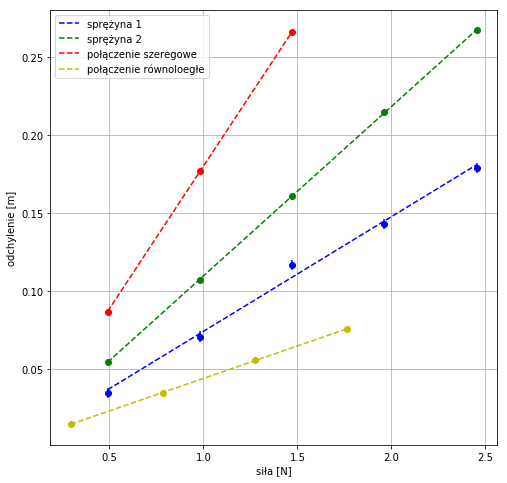

In [12]:
fig = plt.figure()
# ax = fig.gca()
# ax.set_yscale('log')

plt.xlabel('siła [N]')
plt.ylabel('odchylenie [m]')

p1 = plot_with_reg(*flat(k1_raw), k1['err'], 'b', 'sprężyna 1')
p2 = plot_with_reg(*flat(k2_raw), k2['err'], 'g', 'sprężyna 2')
p3 = plot_with_reg(*flat(k_s_raw), k_s['err'], 'r', 'połączenie szeregowe')
p4 = plot_with_reg(*flat(k_p_raw), k_s['err'], 'y', 'połączenie równoloegłe')

plt.legend()
plt.grid()
plt.show()

In [13]:
k1['m'] + k2['m']

0.181855249745158

In [14]:
1/(1/k1['m'] + 1/k2['m'])

0.04377339860945407